# Imports

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data

In [97]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [98]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
# Drop the columns that are not useful
train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [100]:
# Fill the missing values
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [101]:
# Check for duplicates
train.duplicated().sum()

111

In [102]:
train.drop_duplicates(inplace=True)
train.duplicated().sum()

0

<Axes: ylabel='Age'>

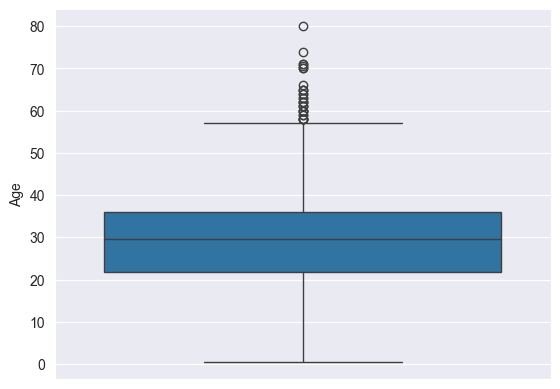

In [103]:
# Check for outliers    
sns.boxplot(train['Age'])


In [104]:
# Convert the categorical columns to numerical (One hot encoding) 
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])

In [105]:
# Split the data into features and target
X = train.drop(columns='Survived')
y = train['Survived']

In [106]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
# Preprocess the test set
test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True


# Test models

## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
accuracy_scores = []

In [109]:
# Create the model
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [110]:
# Make predictions
y_pred = forest.predict(X_test)

In [111]:
# Evaluate the model
accuracy_scores.append({'Random Forest': accuracy_score(y_test, y_pred)}) 

## Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
# Create the model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [114]:
# Make predictions
y_pred = tree.predict(X_test)

In [115]:
# Evaluate the model
accuracy_scores.append({'Decision Tree': accuracy_score(y_test, y_pred)})

## Logistic Regression

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [117]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
# Create the model with increased max_iter
logistic = LogisticRegression(max_iter=1000, random_state=0)
logistic.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [119]:
# Make predictions
y_pred = logistic.predict(X_test_scaled)

In [120]:
# Evaluate the model
accuracy_scores.append({'Logistic Regression': accuracy_score(y_test, y_pred)})

## KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
# Create the model 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [123]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

In [124]:
# Evaluate the model    
accuracy_scores.append({'KNN': accuracy_score(y_test, y_pred)})

## SVM

In [125]:
from sklearn.svm import SVC

In [126]:
# Create the model
svm = SVC(random_state=0)
svm.fit(X_train_scaled, y_train)

SVC(random_state=0)

In [127]:
# Make predictions
y_pred = svm.predict(X_test_scaled)

In [128]:
# Evaluate the model
accuracy_scores.append({'SVM': accuracy_score(y_test, y_pred)})

## Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
# Create the model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [131]:
# Make predictions
y_pred = naive_bayes.predict(X_test)

In [132]:
# Evaluate the model
accuracy_scores.append({'Naive Bayes': accuracy_score(y_test, y_pred)})

## Neural Network

In [133]:
from sklearn.neural_network import MLPClassifier

In [134]:
# Create the model
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

F:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [135]:
# Make predictions
y_pred = mlp.predict(X_test_scaled)

In [136]:
# Evaluate the model
accuracy_scores.append({'Neural Network': accuracy_score(y_test, y_pred)})

# Compare the models

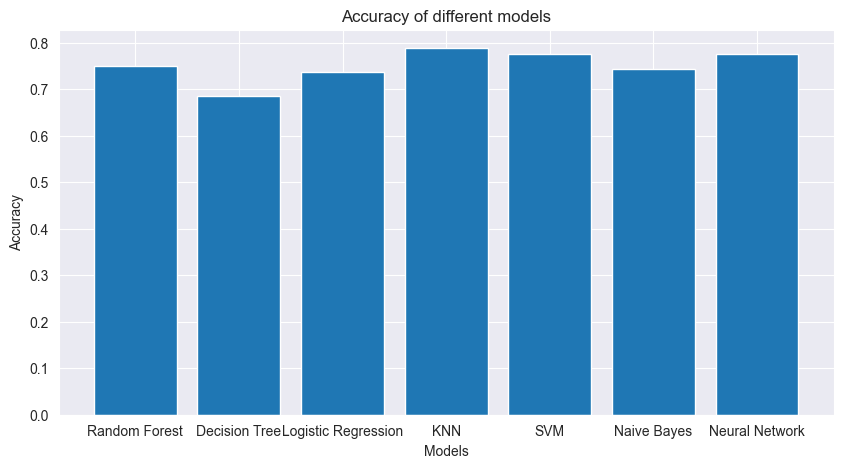

In [137]:
# Plot the accuracy scores
models = [list(model.keys())[0] for model in accuracy_scores]
scores = [list(model.values())[0] for model in accuracy_scores]
plt.figure(figsize=(10,5))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.show()

In [138]:
# The best model
best_model = models[np.argmax(scores)]
best_model

'KNN'

# Make predictions on the test set

In [139]:
# Preprocess the test set   
test_scaled = scaler.transform(test)

In [140]:
# Make predictions
if best_model == 'Random Forest':
    y_pred = forest.predict(test)
elif best_model == 'Decision Tree':
    y_pred = tree.predict(test)
elif best_model == 'Logistic Regression':
    y_pred = logistic.predict(test_scaled)
elif best_model == 'KNN':
    y_pred = knn.predict(test_scaled)
elif best_model == 'SVM':
    y_pred = svm.predict(test_scaled)
elif best_model == 'Naive Bayes':
    y_pred = naive_bayes.predict(test)
elif best_model == 'Neural Network':
    y_pred = mlp.predict(test_scaled)

In [141]:
# Save the predictions (submission is a csv file with two columns: PassengerId and Survived)
submission = pd.DataFrame({'PassengerId': pd.read_csv('test.csv')['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)